## Université Virtuelle du Tchad (UVT)
#### Niveau : Master 1 Sécurité Logiciel
#### Matière : Machine Learning et Deep Learning
#### Année accamdémique : 2022-2023
#### Travaux pratiques (TP)
##### Groupe N°1 : Diagnostic medical
#### Enseignant : Pr. MOUSSA M.BOUKAR


### Membres du groupe : 

##### 01.    ADOUM AHMAT GRENE 
##### 02.   BOKHIT ABDOULAYE DIGUI 
##### 03.   LAGRE GABBA BERTRAND
##### 04.   MADJINGUESSOUM BRICE


## Thématique : Diagnostic medical 

__Algorithme ML__ : Arbre de décision

__Description__ : Développer un modèle d’arbre de décision pour diagnostiquer des affections médicales basées sur les symptômes du patient et son historique médical.


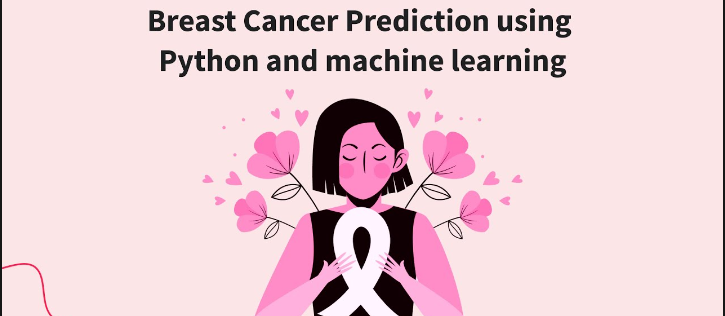

##  <center> Plan de travail : 
  <ol>
     Introduction
      <li>Lecture de données</li>
      <li> Analyse Exploratoire et Visualisation des données</li>
      <li>Traitement des Valeurs abbérrantes</li>
      <li>Équilibrage de l'ensemble de données en utilisant la méthode de sous-échantillonnage.</li>
      <li>Entrainement du Modèle</li>
      <li>Évaluation du modèle à l'aide de la validation croisée</li>
      <li>Test</li>
      <li>Visualisez les résultats de précision à l’aide d’un graphique.</li>
      <li>Exportation du modèle</li>
      <li>Déploiement de la solution</li>
     Conclusion
      
 </ol>
</center>

### Introduction
Le __machine learning__ est une technique de programmation informatique
qui utilise des probabilités statistiques pour donner aux ordinateurs la
capacité d'apprendre par eux-mêmes sans programmation explicite.

La __classification__ est un processus de catégorisation d'un ensemble donné de données
en classes. Elle peut être effectuée sur des données structurées ou non structurées.
Le processus commence par prédire la classe de points de données. Les classes sont
souvent appelées cible, étiquette ou catégories.

Un __arbre de décision__ ou __decision tree__ est un algorithme de Machine Learning qui utilise une structure arborescente pour prendre des décisions ou faire des prédictions. Il s'agit d'un modèle d'apprentissage supervisé, ce qui signifie qu'il est entraîné sur un ensemble de données composé d'exemples avec des étiquettes connues.

Lien du dataset utilisé :  https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset

Lien de notre solution déployée : __https://group1tpml.streamlit.app/__

## 1. Lecture de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import joblib
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")

/home/fouba/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head(20)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


#### Explication des features


###### 1. Mean Radius(Rayon moyen ):

Représente le rayon moyen d'un noyau cellulaire détecté.
Des rayons plus grands peuvent indiquer une croissance cellulaire plus rapide, ce qui peut être un signe de cancer.
###### 2.  Mean Texture(Texture moyenne) :

Capture la variation d'intensité (niveau de gris) des pixels à l'intérieur d'un noyau cellulaire.
Une variabilité accrue de la texture peut être associée à une structure cellulaire anormale, suggérant une tumeur maligne.
###### 3. Mean Perimeter(Périmètre moyen) :

Représente la longueur moyenne de la limite d'un noyau cellulaire.
Un périmètre plus grand, associé à un rayon plus large, peut étayer la notion de croissance cellulaire anormale.
###### 4. Mean Area(Surface moyenne) :

Représente la surface moyenne d'un noyau cellulaire.
L'augmentation de la surface peut être liée à une taille de cellule plus importante, ce qui peut être le signe d'un cancer.
###### 5. Mean Smoothness(Lisse moyenne ):

Mesure le niveau de fluidité de la limite du noyau cellulaire.
Les noyaux plus lisses sont généralement associés à des tumeurs bénignes, tandis que des limites irrégulières et moins lisses peuvent suggérer une tumeur maligne.


In [4]:
# Vérifier les types de notre dataframe
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [5]:
# décrivons maintenant notre dataframe pour voir quelques détails (comme, min, max, écart type, moyenne, q1,q3)

df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
df.describe(include = 'all')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## 2. Analyse Exploratoire et Visualisation des données

In [7]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
# Vérifier les lignes dupliquées
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

Voyons maintenant les rélations entre les features pour éviter la __multicolinéarité__.

<Axes: >

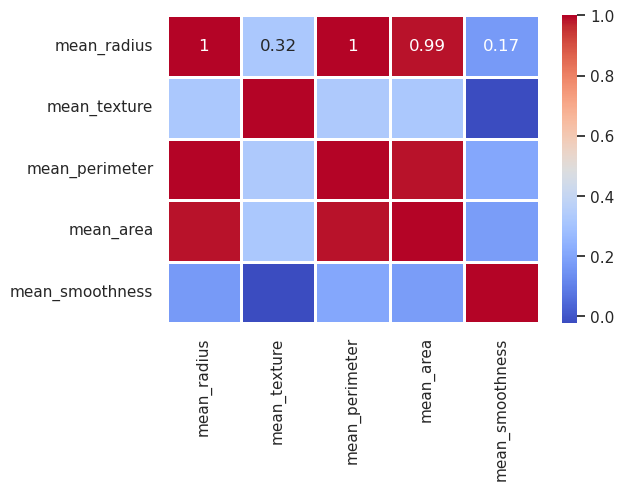

In [9]:

corr = df.select_dtypes("number").drop(columns = "diagnosis").corr()
f = plt.figure(figsize=(6,4))
sns.set()
sns.heatmap(corr, linewidths='1',annot=True,cmap='coolwarm')

Il y a de colonnes fortement corrélées. Nous allons les traiter dans la suite.

Maintenant, voyons la répartition de notre targuet suivant les deux valeurs qu'elle comporte.


In [10]:
df['diagnosis'].unique()

array([0, 1])

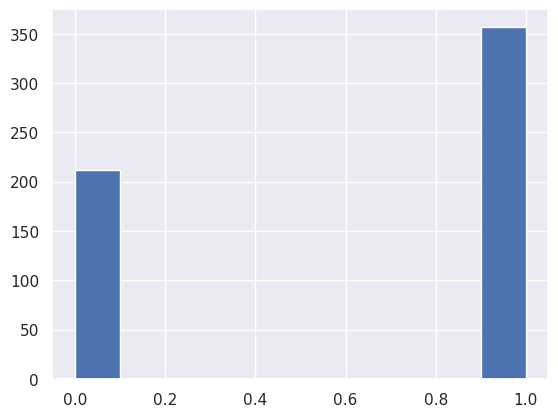

In [11]:
plt.hist(df["diagnosis"])
# Afficher le graphique
plt.show()

In [12]:
# on convertit les features en une liste de columns
columns_list = df.columns.tolist()
columns_list

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'diagnosis']

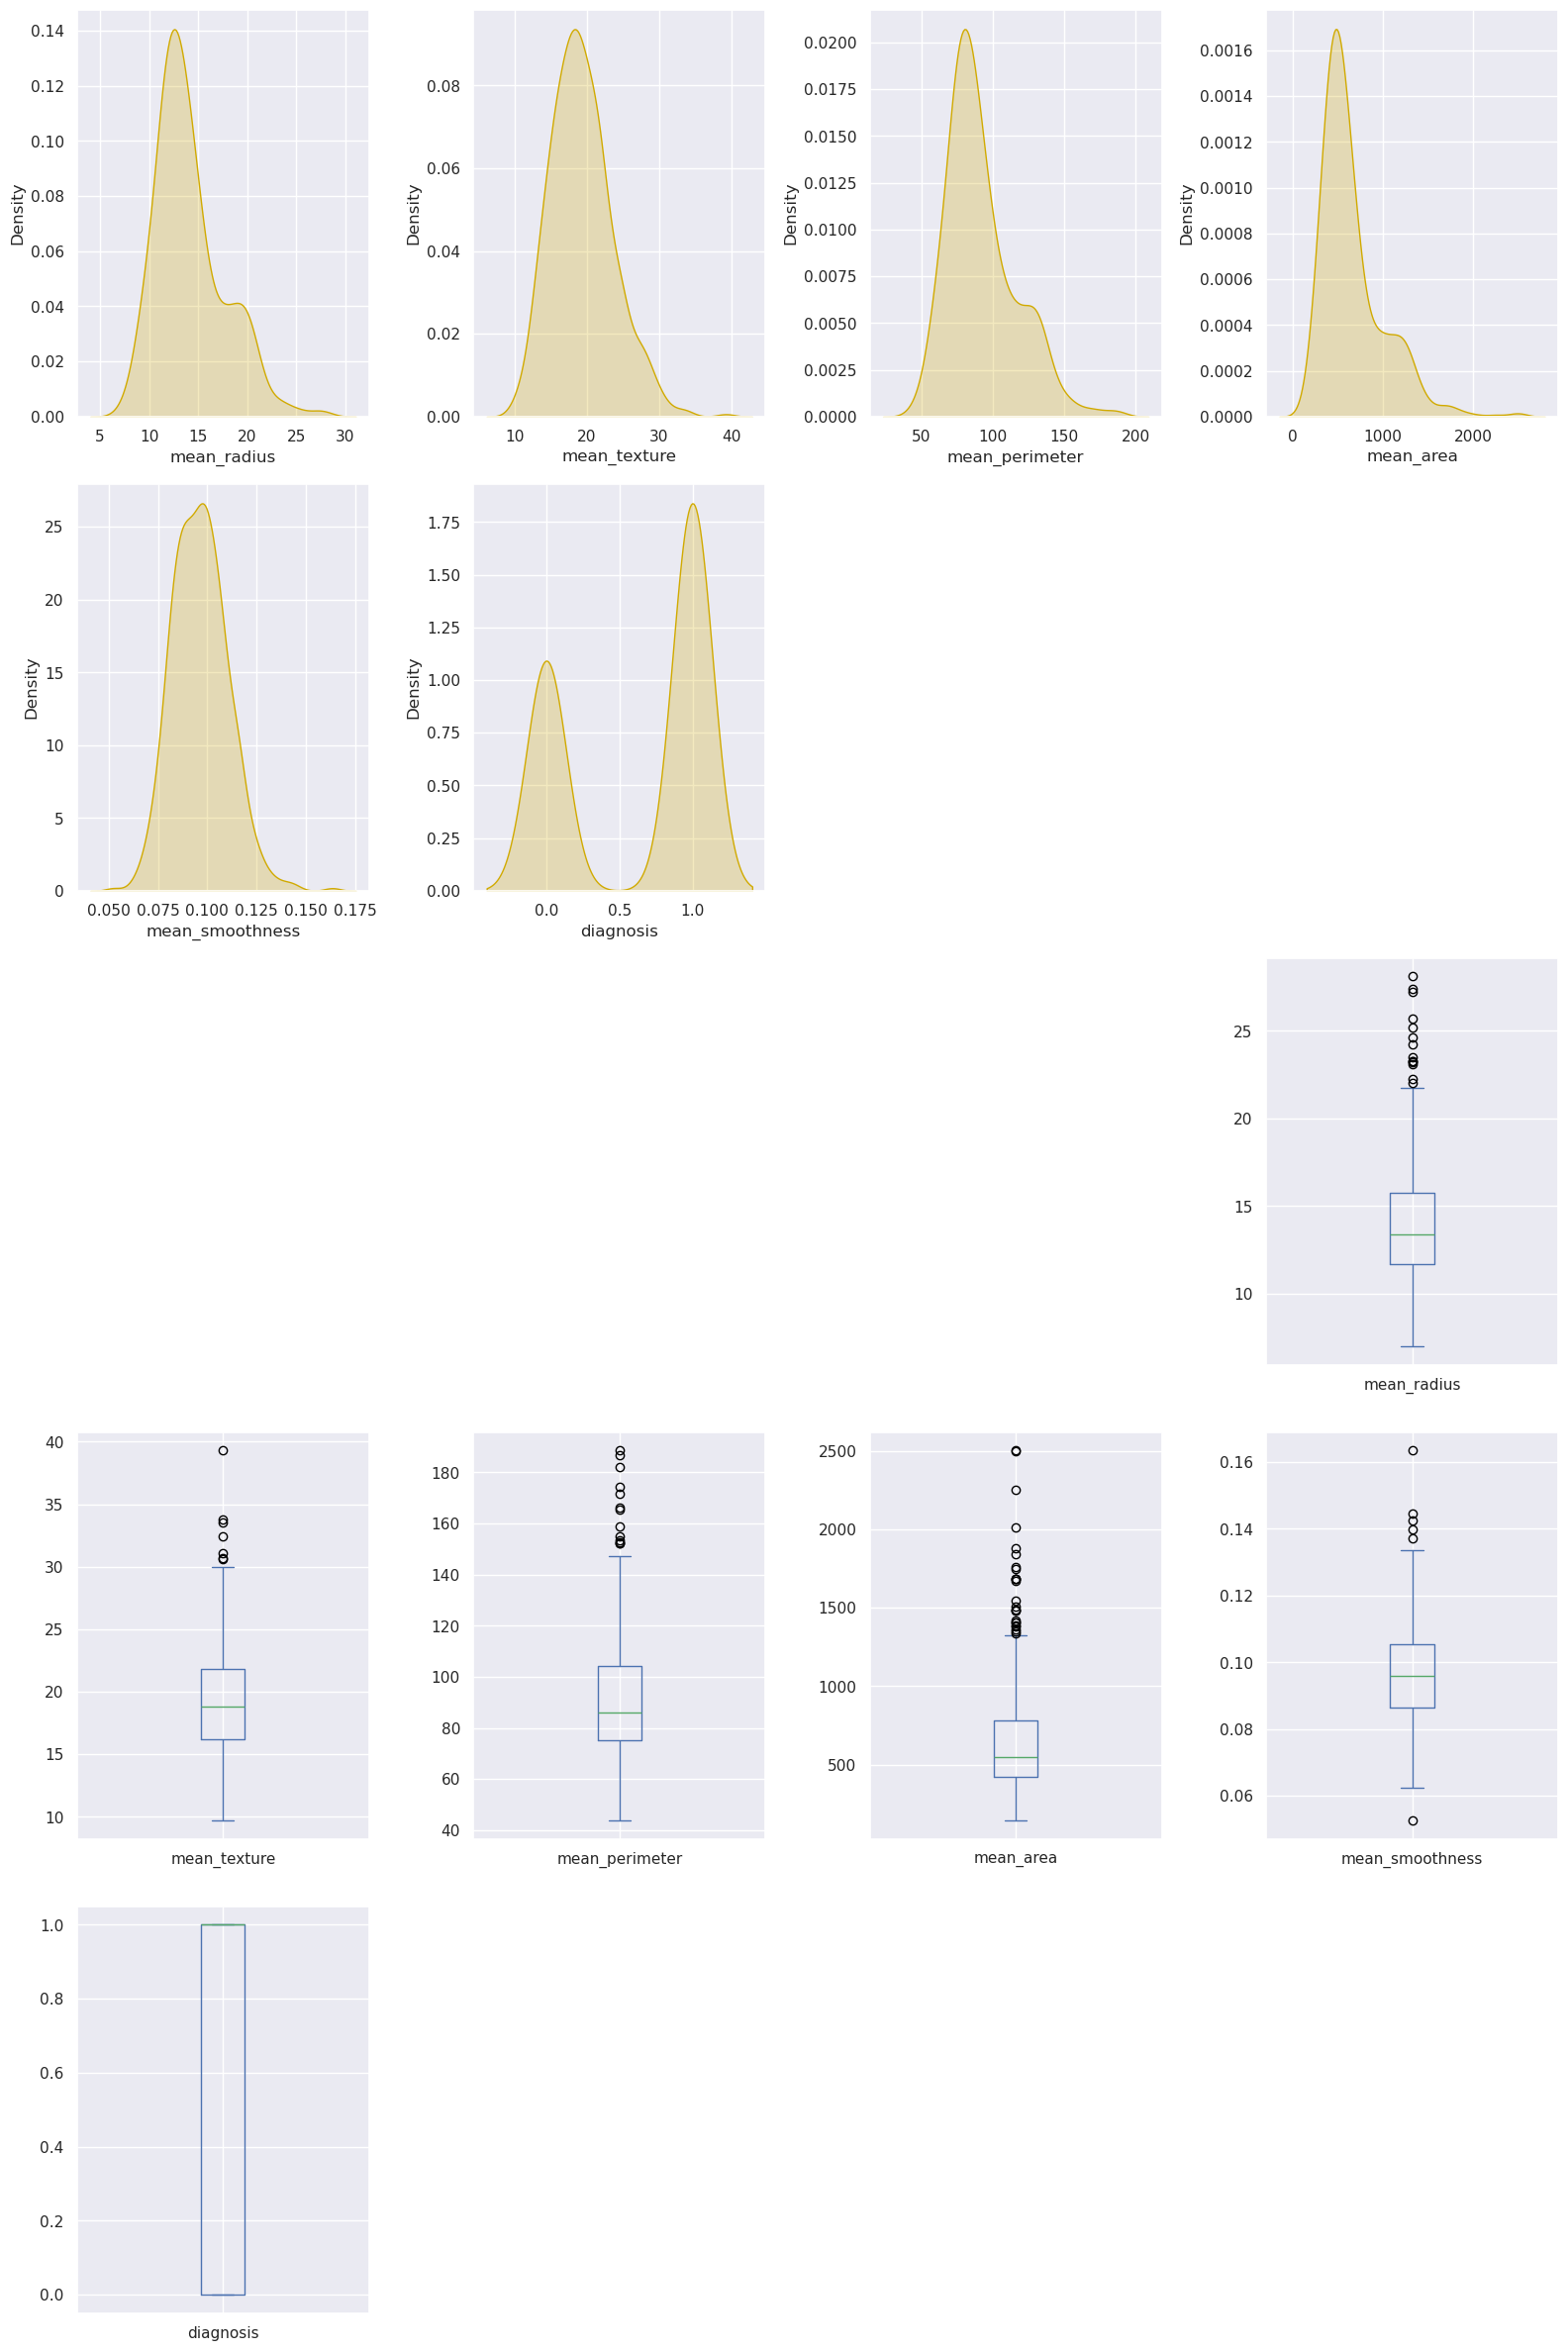

In [13]:
# Voyons la disposition de données pour chaque colonne.
plt.figure(figsize=(16,38))
for i, col in enumerate(columns_list, 1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color = '#d1aa00', fill = True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout()
plt.show()


Encore, pouvons-nous confirmer qu'il y a les outliers dans notre dataset.

Créons une colonne comme signification du target diagnosis.

In [14]:
def tumeur_colonne(diagnosis):
    if diagnosis == 1:
        return "Maligne"
    else:
        return "Benigne"

df['Tumeur'] = df['diagnosis'].apply(tumeur_colonne)
df.sample(frac=1).head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,Tumeur
477,13.90,16.62,88.97,599.4,0.06828,1,Maligne
54,15.10,22.02,97.26,712.8,0.09056,0,Benigne
418,12.70,12.17,80.88,495.0,0.08785,1,Maligne
159,10.90,12.96,68.69,366.8,0.07515,1,Maligne
198,19.18,22.49,127.50,1148.0,0.08523,0,Benigne


De ce fait , transformons notre colonne en une liste. Elle nous permettra d'avoir une idée sur le nombre de chaque tumeur.

In [15]:
tumeur = df['Tumeur'].tolist()
print("Le nombre de tumeur maligne est : ", tumeur.count('Maligne'))
print("Le nombre de tumeur Benigne est : ", tumeur.count('Benigne'))

Le nombre de tumeur maligne est :  357
Le nombre de tumeur Benigne est :  212


Définissons une fonction qui peut montrer la rélation entre chaque variable et la cible, représentée par la colonne  __Tumeur__.

In [16]:

def show_relation(name):
    sns.kdeplot(df.loc[df['Tumeur']=='Maligne',name], label='Maligne')
    sns.kdeplot(df.loc[df['Tumeur']=='Benigne',name], label='Benigne')
    plt.legend()
    plt.show()

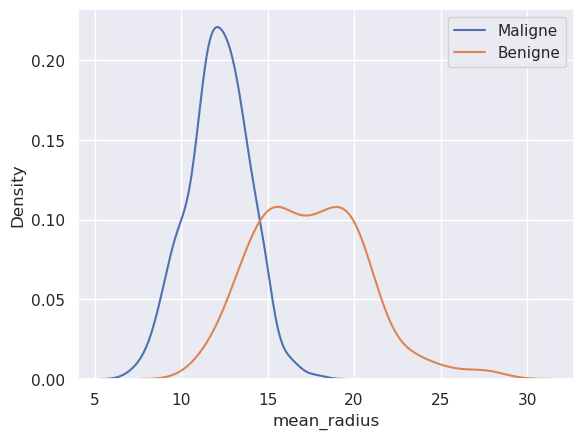

In [17]:
# Impact de "mean_radius" sur la cible
show_relation("mean_radius")

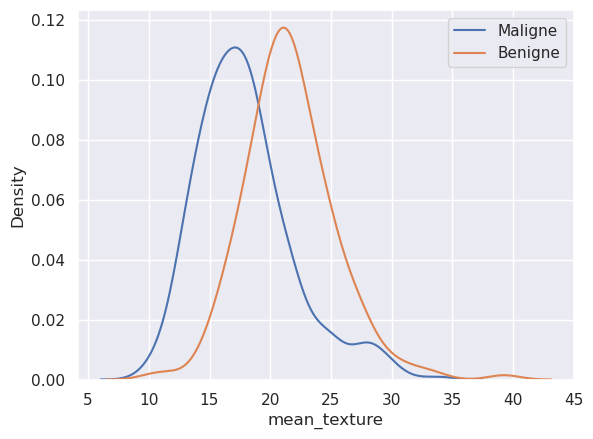

In [18]:
# Impact de "mean_texture" sur la cible
show_relation("mean_texture")

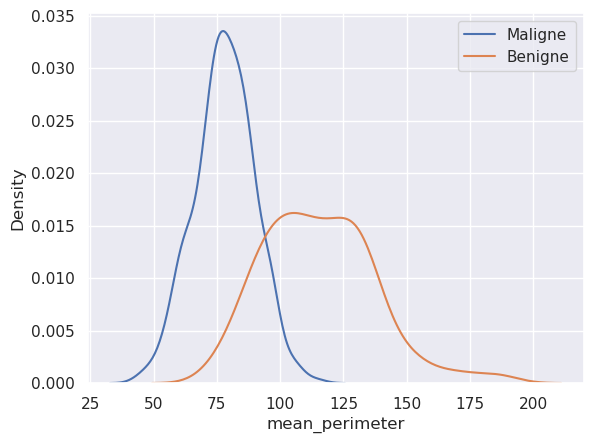

In [19]:
# Impact de "mean_perimeter" sur la cible
show_relation("mean_perimeter")

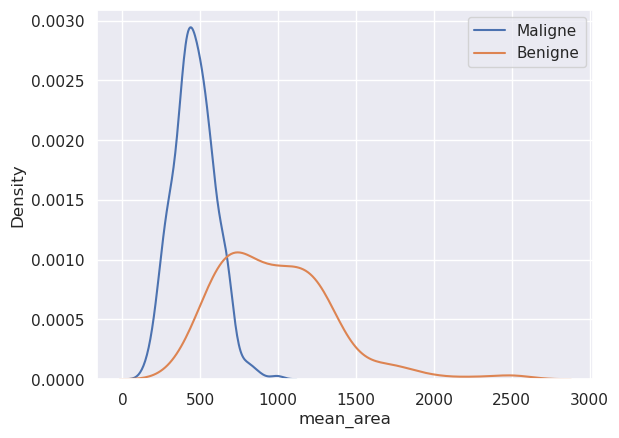

In [20]:
# Impact de "mean_area" sur la cible
show_relation("mean_area")

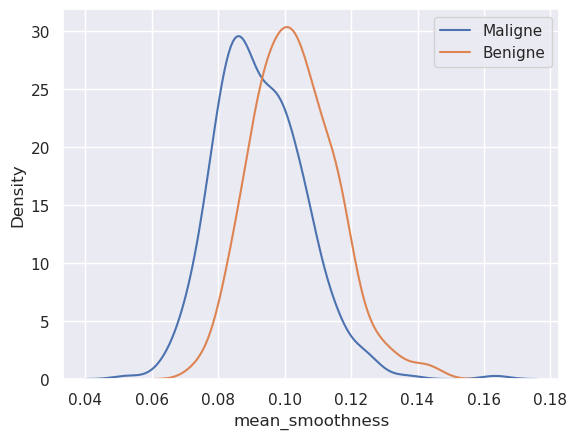

In [21]:
# Impact de "mean_smoothness" sur la cible
show_relation("mean_smoothness")

## 3. Traitement des Valeurs abbérrantes

Vérifions si notre dataset ne comporte pas de  valeurs nulles

In [22]:
 df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
Tumeur             0
dtype: int64

Donc il n'ya pas de valeur nulle. Vérifions s'il existe de NaN.

In [23]:
     df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
Tumeur             0
dtype: int64

Aucune valeur NaN non plus. Assurons-nous une fois qu'il n'ya pas de valeurs dupliquées.   

In [24]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

Le resultat nous montre qu'il ya aucune valeur dupliquée.

Faisons le test de skewness et kurtosis pour voir les valeurs disparates ( outliers)

In [25]:
pd.DataFrame(data=[df[columns_list].skew(),df[columns_list].kurtosis()],index=['skewness','kurtosis'])

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
skewness,0.942380,0.650450,0.990650,1.645732,0.456324,-0.528461
kurtosis,0.845522,0.758319,0.972214,3.652303,0.855975,-1.726811


In [26]:

from scipy.stats import zscore


for i in columns_list:
    y_outliers = df[abs(zscore(df[i])) >= 3 ]
    print('Le nombre des outliers de ',i,'est ',len(y_outliers))
    y_outliers
    


Le nombre des outliers de  mean_radius est  5
Le nombre des outliers de  mean_texture est  4
Le nombre des outliers de  mean_perimeter est  7
Le nombre des outliers de  mean_area est  8
Le nombre des outliers de  mean_smoothness est  5
Le nombre des outliers de  diagnosis est  0


Maintenant, supprimons ces outliers avec ce fonction : 

In [27]:
def handle_outliers(df):
    outlier_masks = {}
    for col in columns_list:
        data = df[col]
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_mask = (data < lower_bound) | (data > upper_bound)
        return df[outlier_mask]
handle_outliers(df)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,Tumeur
82,25.22,24.91,171.5,1878.0,0.10630,0,Benigne
108,22.27,19.67,152.8,1509.0,0.13260,0,Benigne
122,24.25,20.20,166.2,1761.0,0.14470,0,Benigne
164,23.27,22.04,152.1,1686.0,0.08439,0,Benigne
180,27.22,21.87,182.1,2250.0,0.10940,0,Benigne
202,23.29,26.67,158.9,1685.0,0.11410,0,Benigne
212,28.11,18.47,188.5,2499.0,0.11420,0,Benigne
236,23.21,26.97,153.5,1670.0,0.09509,0,Benigne
339,23.51,24.27,155.1,1747.0,0.10690,0,Benigne
352,25.73,17.46,174.2,2010.0,0.11490,0,Benigne


## 4. Équilibrage de l'ensemble de données en utilisant la méthode de sous-échantillonnage.

In [28]:
rus = RandomUnderSampler(sampling_strategy=1)

In [29]:
inputs = df.drop(['diagnosis','Tumeur'],axis=1)
inputs

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [30]:
target = df['diagnosis']
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

Maintenant on peut équilibrer notre dataset.

In [31]:
X_res, y_res = rus.fit_resample(inputs, target)

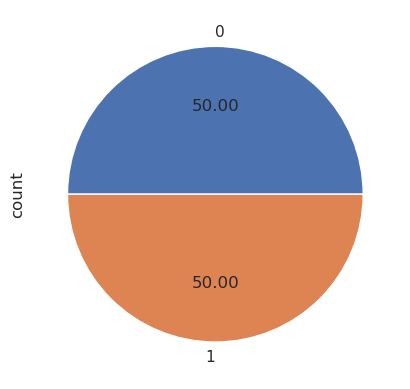

In [32]:
ax = y_res.value_counts().plot.pie(autopct = "%.2f")

In [33]:
X_res.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


## 5. Entrainement du Modèle

In [34]:
X = df.iloc[:, 0:5].values
Y = df.iloc[:, 5].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [36]:
"""from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)"""

'from sklearn.preprocessing import LabelEncoder\nlabelencoder_Y = LabelEncoder()\nY = labelencoder_Y.fit_transform(Y)'

In [37]:
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

Implémentons chacun de ces cas dans sur notre modèle :

In [38]:
import sklearn.linear_model as sk
from sklearn.tree import DecisionTreeClassifier


#### Decision Tree Algorithm


In [39]:
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
print("Le score est  :")
round(classifier_DT.score(X_test, Y_test),2)

Le score est  :


0.9

In [41]:
from sklearn.metrics import mean_squared_error

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("L'erreur  est :")
round(mean_squared_error(predictions, Y_test),1)

L'erreur  est :


0.1

In [42]:
Y_pred = classifier_DT.predict(X_test)


#### La matrice de confusion
La matrice de confusion est un outil de mesure de la performance des modèles de classification à 2 classes ou plus. 

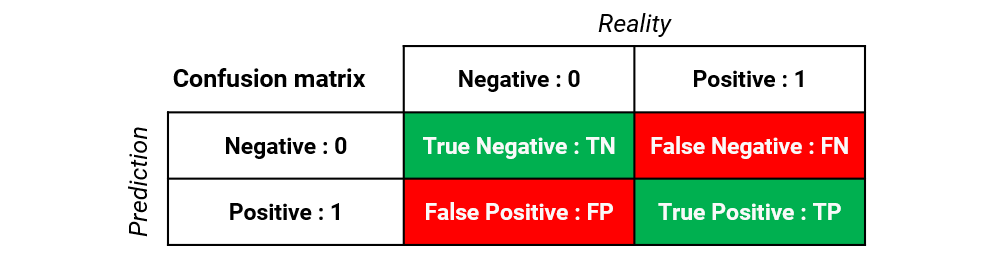

Dans une matrice de confusion, on peut avoir ce genre  de cas  :
- Le Vrai Positif (vp )
- Le Faux Positif (fp)
- Le Vrai Negatif (vn)
- Le Faux Négatif (fn)
    

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[57,  6],
       [11, 97]])

Voici sa matrice de confusion : 

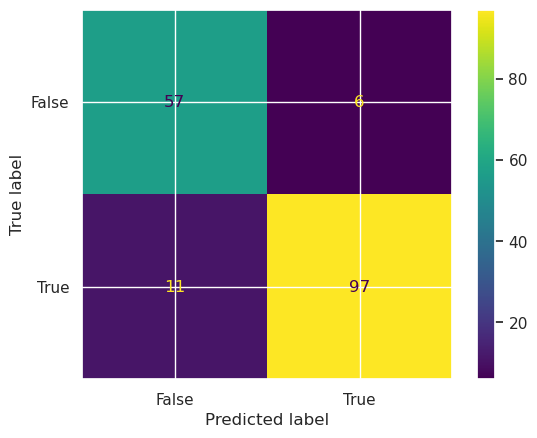

In [44]:

import sklearn.metrics as metrics


confusion_matrix = confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

Déterminons le nombre de vrai positif(vp),vrai négatif(vn), faux positif(fp),faux négatif (fn).

In [45]:

vn, fp, fn, vp = confusion_matrix.ravel()
 
print("Vrai Positive (VP): ", vp)
print("Vrai Negative (VN): ", vn)
print("Faux Positive (FP): ", fp)
print("Faux Negative (FN): ", fn)
 
# Calcul de accuracy
accuracy = (vp + vn) / (vp + vn + fp + fn)
 
# Calcul de precision
precision = vp / (vp + fp)
 
# Calcul de recall
recall = vp / (vp + fn)
 
# Calcul de F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
 
print("\n\nFormule de calcul:")
print("Accuracy: (VP + VN) / (VP + VN + FP + FN)")
print("Precision: VP / (VP + FP)")
print("Recall: VP / (VP + FN)")
print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
 
print("\n\nRésulats:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("Recall: ", round(recall, 2))
print("F1-score: ", round(f1_score, 2))

Vrai Positive (VP):  97
Vrai Negative (VN):  57
Faux Positive (FP):  6
Faux Negative (FN):  11


Formule de calcul:
Accuracy: (VP + VN) / (VP + VN + FP + FN)
Precision: VP / (VP + FP)
Recall: VP / (VP + FN)
F1-score: 2 * (Precision * Recall) / (Precision + Recall)


Résulats:
Accuracy:  0.9
Precision:  0.94
Recall:  0.9
F1-score:  0.92


In [46]:
print("Le score est  :")
round(classifier_DT.score(X_test, Y_test), 2)

Le score est  :


0.9

In [47]:
X_test

array([[1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01],
       [1.321e+01, 2.525e+01, 8.410e+01, 5.379e+02, 8.791e-02],
       [1.402e+01, 1.566e+01, 8.959e+01, 6.065e+02, 7.966e-02],
       [1.426e+01, 1.817e+01, 9.122e+01, 6.331e+02, 6.576e-02],
       [1.303e+01, 1.842e+01, 8.261e+01, 5.238e+02, 8.983e-02],
       [1.134e+01, 1.861e+01, 7.276e+01, 3.912e+02, 1.049e-01],
       [1.205e+01, 2.272e+01, 7.875e+01, 4.478e+02, 6.935e-02],
       [1.170e+01, 1.911e+01, 7.433e+01, 4.187e+02, 8.814e-02],
       [7.729e+00, 2.549e+01, 4.798e+01, 1.788e+02, 8.098e-02],
       [1.026e+01, 1.471e+01, 6.620e+01, 3.216e+02, 9.882e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, 6.561e+02, 1.031e-01],
       [1.462e+01, 2.402e+01, 9.457e+01, 6.627e+02, 8.974e-02],
       [9.397e+00, 2.168e+01, 5.975e+01, 2.688e+02, 7.969e-02],
       [1.684e+01, 1.946e+01, 1.084e+02, 8.802e+02, 7.445e-02],
       [1.464e+01, 1.524e+01, 9.577e+01, 6.519e+02, 1.132e-01],
       [1.546e+01, 1.189e+01, 1.025e+02,

In [48]:
Y_pred = classifier_DT.predict(X_test)
Y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

## 6. Évaluation du modèle à l'aide de la validation croisée

a. Accuracy

In [49]:
accuracy_scores = cross_val_score(classifier_DT, X_res, y_res, cv = 10, scoring='accuracy')

In [50]:
print(accuracy_scores)

[0.86046512 0.81395349 0.93023256 0.8372093  0.9047619  0.9047619
 0.92857143 0.9047619  0.88095238 0.95238095]


In [51]:
print(round(accuracy_scores.mean(),2) )

0.89


b. Precision

In [52]:
precision_scores = cross_val_score(classifier_DT, X_res, y_res, cv = 10, scoring='precision')

In [53]:
print(precision_scores)

[0.82608696 0.74074074 0.91304348 0.77777778 0.94736842 0.9047619
 0.95       0.9047619  0.94444444 1.        ]


In [54]:
print(round(precision_scores.mean(),2) )

0.89


c. Score F1

In [55]:
f1_score = cross_val_score(classifier_DT, X_res, y_res, cv = 10, scoring='f1_macro')

In [56]:
print(f1_score)


[0.86038961 0.81140351 0.9300813  0.83397683 0.90454545 0.9047619
 0.92853091 0.9047619  0.88034188 0.95227273]


In [57]:
print(round(f1_score.mean(),2) )

0.89


d. Rappel(support)

In [58]:
recall_scores = cross_val_score(classifier_DT, X_res, y_res, cv = 10, scoring='recall_macro')

In [59]:
print(recall_scores)

[0.86147186 0.81709957 0.92965368 0.83441558 0.9047619  0.9047619
 0.92857143 0.9047619  0.88095238 0.95238095]


In [60]:
print(round(recall_scores.mean(),2) )

0.89


## 7.Visualisez les résultats de précision à l’aide d’un graphique.

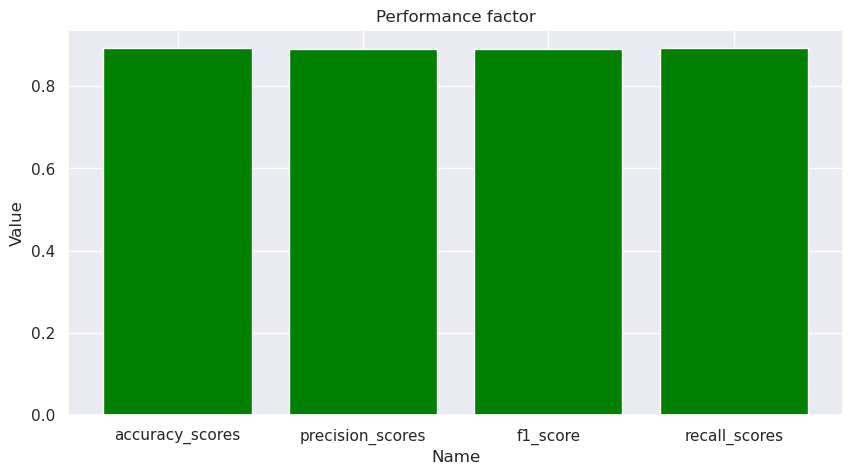

In [61]:
names = ['accuracy_scores', 'precision_scores', 'f1_score','recall_scores']
values = [accuracy_scores.mean(), precision_scores.mean(), f1_score.mean(), recall_scores.mean()]


plt.figure(figsize=(10, 5))
plt.bar(names, values, color='green')
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Performance factor')

plt.show()

## 8. Exportation du modèle

In [62]:
joblib.dump(classifier_DT, "Breast_cancer_data.sav")

['Breast_cancer_data.sav']

## 9. Déploiement de la solution
Lien de la solution déployée : __https://group1tpml.streamlit.app/__

Pour avoir un bref aperçu, on visualiser de manière dynamiuque notre dataset grâce à la bibliothèque __dtale__.

In [63]:
import dtale
data =dtale.show(df)
data

## Conclusion


En guise de conclusion, ce présent travail entre dans le cadre de Travaux Pratiques de Machine Learning / Deep Learning.
Le but ultime de cette réalisation consiste à développer une solution automatique qui servira à diagnostiquer des affections médicales basées sur les
symptômes du patient et son historique médical.

L'algorithme exigé est le Decision Tree (Arbre de décision) et le jeu de données est téléchargé sur la plateforme kaggle. Le lien est mentionné ci-haut. Après nettoyage, préparation du modèle, test et validation, nous obtenons un Mean Square Error (MSE) de __0.1__. Ce peut resultat peut être amélioré et nous sommes ouverts à toutes critiques, remarques et suggestions.
